In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, expon, gamma
from numpy.random import randn
from numpy import mean, linspace, sum
from scipy.special import gamma as Γ
from scipy.stats import norm
from scipy.integrate import quad 
from numpy import inf as ᨖ

# Parameter Estimation For Exponential Distribution<br>
In this example, given data $\mathcal{D}$, we are going to estimate the parameters of an Exponential Distribution using<br>
- Bayesian Parameter Estimation<br>
- MAP<br>
- Note that the equation for an exponential distribution is<br>
$$ p(x) = \lambda e^{-\lambda x} $$<br>
$$ E[X] = \frac{1}{\lambda}$$<br>
- For Exponential distribution, the conjugate prior is the Gamma distribution where<br>
$$ p(\lambda) = \frac{1}{\Gamma(k) \theta^k} \lambda^{k-1} e^{-\lambda/\theta}.$$

### The likelihood, Prior, and the Posterior<br>
Given n samples, the likelihood function is<br>
$$ p(X = \mathcal{D}|\lambda) = \prod_i \; \lambda e^{- \lambda x_i} = \lambda^n e^{-\lambda \sum_i \; x_i}$$.<br>
Given the joint likelihood function and the conjugate prior, we know that $p(\lambda|X=\mathcal{D}) \propto  p(X=\mathcal{D}|\lambda)p(\lambda)$, therefore<br>
$$p(\lambda|X=\mathcal{D}) \propto \left( \lambda^n e^{-\lambda \sum_i \; x_i} \right) \left( \frac{1}{\Gamma(k) \theta^k} \lambda^{k-1} e^{-\lambda/\theta} \right).$$<br>
If we combine the terms together, we get<br>
$$p(\lambda|X=\mathcal{D}) \propto \frac{1}{\Gamma(k) \theta^k} \lambda^{k+n-1} e^{-\lambda (\sum_i x_i + \frac{1}{\theta})}$$<br>
Since $p(\lambda|X=\mathcal{D})$ is in terms of $\lambda$, the term $\frac{1}{\Gamma(k) \theta^k}$ at the front is just a constant, therefore<br>
$$p(\lambda|X=\mathcal{D}) = \eta \lambda^{k+n-1} e^{-\lambda (\sum_i x_i + \frac{1}{\theta})}$$<br>
- Pay special attention to the fact that we went from $\propto$ to = sign. <br>
- This is because we may not know the exact proportion of $\eta$, but we the posterior is equal to a constant multiple<br>
- Once we simplified the equation, we notice that the structure of the residual equation is identical to a gamma distribution if<br>
$$\hat{k} = k + n, \quad \quad \theta' = \frac{1}{\sum_i x_i - 1/\theta}$$<br>
Giving us the posterior distribution<br>
$$ p(\lambda|X=\mathcal{D}) = \frac{1}{\Gamma(\hat{k}) \; \theta'^\hat{k}} \; \lambda^{\hat{k}-1} e^{-\lambda/\theta'}.$$

#### Assume data is exponential, we will synthetically generate the data here

In [3]:
n = 1000
μ = 3
X = expon.rvs(scale=μ, size=n)

#### Define the prior gamma distribution as

In [4]:
k = 2
θ = 2
ǩ = k + n
θˊ = 1/(sum(X) + 1/θ)

#### Mode is the MAP solution<br>
mode = $(k-1) \theta$<br>
mean = $k \theta$

In [5]:
MAP_solution = (ǩ - 1)*θˊ
BPE_solution = ǩ*θˊ

In [6]:
print('Theoretical Truth = %.4f'%(1/μ))
print('Best λ according to MAP = %.4f'%MAP_solution)
print('Best λ according to MLE = %.4f'%(1/mean(X)))
print('Best λ according to Bayesian Parameter Estimation = %.4f'%(BPE_solution))

Theoretical Truth = 0.3333
Best λ according to MAP = 0.3181
Best λ according to MLE = 0.3178
Best λ according to Bayesian Parameter Estimation = 0.3184


	### Plotting out the Prior and posterior<br>
	In this example, we are going to assume a Gamma Prior with k = 2

In [7]:
x = linspace(0.2,0.5, 200);
y = gamma.pdf(x, ǩ, loc=0, scale=θˊ);

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(121);
plt.hist(X, density=True, bins=30);
plt.title('Histogram of X')

Text(0.5, 1.0, 'Histogram of X')

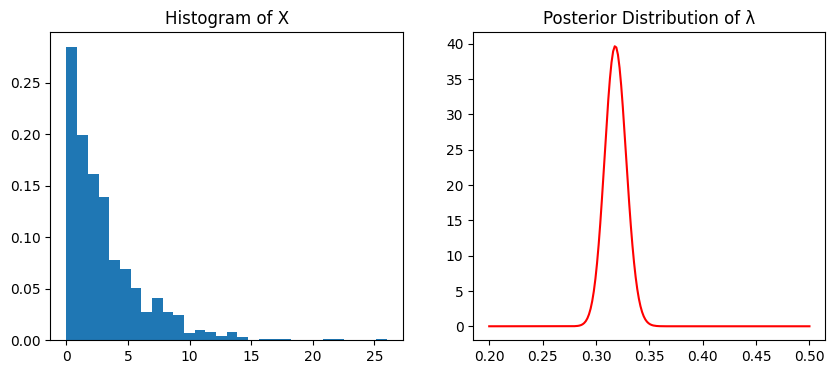

In [9]:
plt.subplot(122)
plt.plot(x,y,color='red')
plt.title('Posterior Distribution of λ')
plt.show()

## Finding the Prdictive Posterior $p(x|\mathcal{D})$ <br>
Our goal is to next find the $p(x|\mathcal{D})$ which has the equation<br>
$$p(x|\mathcal{D}) = \int p(x|\lambda) p(\lambda|\mathcal{D}) \; d\lambda$$<br>
Remember that in the previous step, we already found<br>
$$ p(\lambda|X=\mathcal{D}) = \frac{1}{\Gamma(\hat{k}) \; \theta'^\hat{k}} \; \lambda^{\hat{k}-1} e^{-\lambda/\theta'}.$$<br>
Therefore, the Predictive Posterior becomes<br>
$$p(x|\mathcal{D}) = \int \; \left(\lambda e^{-\lambda x} \right) \left( \frac{1}{\Gamma(\hat{k}) \; \theta'^\hat{k}} \; \lambda^{\hat{k}-1} e^{-\lambda/\theta'} \right) \; d\lambda$$<br>
Let's now multiply them together, and rearrange<br>
$$p(x|\mathcal{D}) = \frac{1}{\Gamma(\hat{k})  \; \theta'^\hat{k}} \int \;   \; \lambda^{\hat{k}} e^{-\lambda (x + 1/\theta')} \; d\lambda$$<br>
Here, notice that the remaining terms in the integral looks almost like another Gamma distribution. Let's try to make it look exactly like a gamma distribution by rearranging it<br>
$$p(x|\mathcal{D}) = \frac{1}{\Gamma(\hat{k})  \; \theta'^{\hat{k}}} \int \;   \; \lambda^{(\hat{k}+1) - 1} e^{-\lambda (x + 1/\theta')} \; d\lambda$$<br>
Now if we do a variable change, we can set it such that<br>
$$k'' = \hat{k}+1, \quad \theta'' = \frac{1}{(x + 1/\theta')}$$<br>
then<br>
$$p(x|\mathcal{D}) = \frac{1}{\Gamma(\hat{k})  \; \theta'^{\hat{k}}} \int \;   \; \lambda^{k'' - 1} e^{-\lambda/\theta''} \; d\lambda.$$<br>
It is very easy to now see that the terms inside the integral looks like a Gamma distribution, this implies that we could make it look exactly like Gamma by multiply it with 1 <br>
$$p(x|\mathcal{D}) = \frac{\Gamma(k'')  \; \theta''^{k''}}{\Gamma(\hat{k})  \; \theta'^{\hat{k}}} 		\int \;   \frac{1}{\Gamma(k'')  \; \theta''^{k''}}  \; \lambda^{k'' - 1} e^{-\lambda/\theta''} \; d\lambda.$$<br>
The reason why we put what's inside the integral to be exactly a Gamma distribution is because the integral of any distribution is always = 1, allowing us to remove the term.  <br>
$$p(x|\mathcal{D}) = \frac{\Gamma(k'')  \; \theta''^{k''}}{\Gamma(\hat{k})  \; \theta'^{\hat{k}}} .$$

Remember that $\Gamma(n) = (n-1)!$, therefore<br>
$$\frac{\Gamma(k'')}{\Gamma(\hat{k})} = \frac{(1003 - 1)!}{(1002 - 1)!} = 1002 = \hat{k}.$$<br>
Also remember that<br>
$$\theta' = \frac{1}{\sum_i x_i + 1/\theta} = \frac{\theta}{\theta \sum_i x_i + 1}.$$<br>
and<br>
$$\theta'' = \frac{1}{x + 1/\theta'} = \frac{1}{\theta x/\theta + (\theta \sum_i x_i + 1)/\theta} = \frac{\theta}{\theta x + \theta \sum_i x_i + 1}$$<br>
therefore, <br>
$$\frac{\theta''^{k''}}{\theta'^{\hat{k}}} = \frac{\theta^{1003}}{(\theta x + \theta \sum_i x_i + 1)^{1003}} \frac{(\theta \sum_i x_i + 1)^{1002}}{\theta^{1002}} = \theta \left( \frac{\theta \sum_i x_i + 1}{\theta x +  \theta \sum_i x_i + 1} \right)^{1002} \frac{1}{\theta x + \theta \sum_i x_i + 1}$$<br>
If we let $\alpha = \theta \sum_i x_i + 1$ then<br>
$$p(x|\mathcal{D}) = \theta \hat{k} \left( \frac{\alpha}{\theta x + \alpha} \right)^{1002} \frac{1}{\theta x + \alpha}.$$

In [10]:
def posterior(x):
	α = θ*sum(X) + 1
	out = θ*ǩ*(α/(θ*x + α))**1002/(θ*x + α)
	return out

### Making sure the posterior is still a probability distribution<br>
- when taking an integral from 0 to ᨖ , it should add up to 1 

In [11]:
I, err = quad(posterior, 0, ᨖ ) 
print('The area of the probability = %.4f, confirm that it is a proper probability distribution'%I) 

The area of the probability = 1.0000, confirm that it is a proper probability distribution


### Generate the predictive posterior distribution histogram via ancestral sampling<br>
- Since we have the joint distribution, we can obtain the marginal by generating samples of $(x, \lambda)$ from the joint distribution and discard the $\lambda$ values.<br>
- To generate the samples, we can use ancestral sampling. <br>
- That is, we first sample from the gamma distribution, depending on the $\lambda$ generated, we can generate $x$ using the exponential distribution.

In [12]:
posterior_samples = []
λs = gamma.rvs(ǩ, loc=0, scale=θˊ, size=n);
for λ in λs: posterior_samples.append(expon.rvs(loc=0, scale= (1/λ)))

### Let's plot out the predictive posterior <br>
- We will now plot out the posterior function as well as the histogram generated via sampling

In [13]:
x = linspace(0, 20, 100)
y = posterior(x)

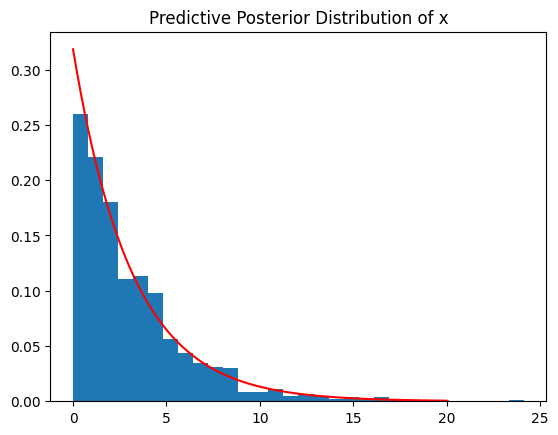

In [14]:
plt.plot(x,y,color='red')
plt.hist(posterior_samples, density=True, bins=30);
plt.title('Predictive Posterior Distribution of x')
plt.show()